In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
loan = pd.read_csv("loan.csv", dtype={"next_pymnt_d" : str})
loan.shape
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
#drop columns having all null value
df = loan
df.columns
for col in df.columns :
    if df[col].isnull().sum() > 36000 :
        df = df.drop([col], axis=1)

#drop rows having all null value
df1 = df.dropna(how="all")

In [6]:
# Drop columns having single value
df1=df1.drop(["collections_12_mths_ex_med"], axis=1)
df1 = df1.drop(columns=["application_type", "chargeoff_within_12_mths", "acc_now_delinq", "delinq_amnt", "tax_liens", "policy_code"])


In [7]:
# Clean data value by removing suffix character
df1["term"] = df1["term"].apply(lambda x : x.split()[0])
df1["int_rate"] = df1["int_rate"].apply(lambda x : x.removesuffix("%"))
df1["revol_util"] = df1["revol_util"].apply(lambda x : str(x).removesuffix("%"))



In [8]:
#  dataframe for all loan which are defaulted.
df_c = df1[df1["loan_status"] == "Charged Off"]

#  dataframe for all loan which are fully paid.
df_p = df1[df1["loan_status"] == "Fully Paid"]

#  dataframe for all loan which are running
df_r = df1[df1["loan_status"] == "Current"]



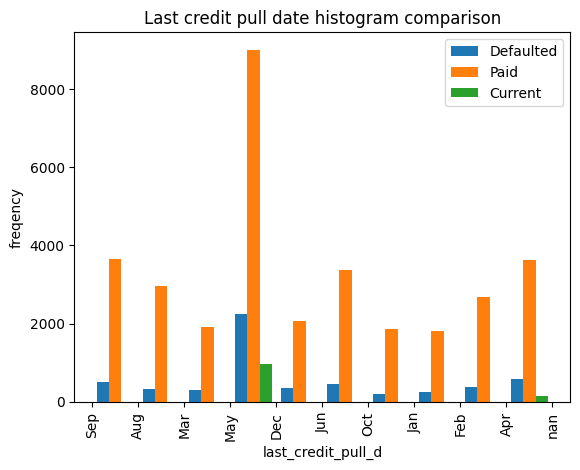

In [9]:
#Compare last_credit_pull_d using hist graph across each of "defaulted", "Paid", "Current"
x = df_c["last_credit_pull_d"].apply(lambda x : str(x)[0:3])
y = df_p["last_credit_pull_d"].apply(lambda x : str(x)[0:3])
z = df_r["last_credit_pull_d"].apply(lambda x : str(x)[0:3])

o1, o2, o3 = plt.hist([x, y, z], label=['Defaulted', 'Paid', "Current"])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('Last credit pull date histogram comparison')
plt.xlabel('last_credit_pull_d')
plt.ylabel('freqency')

plt.show()

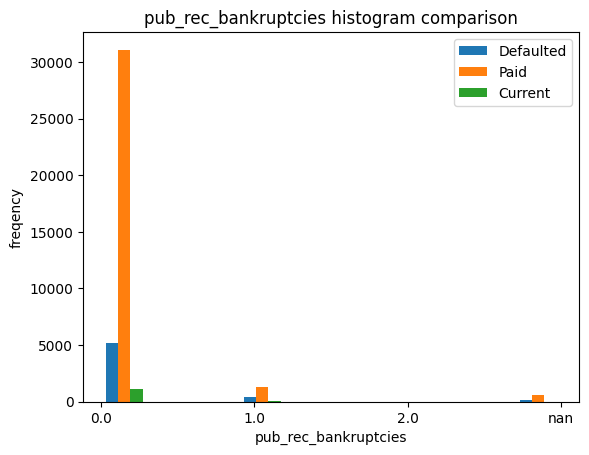

In [10]:
#Compare pub_rec_bankruptcies using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["pub_rec_bankruptcies"].astype(str)
y = df_p["pub_rec_bankruptcies"].astype(str)
z = df_r["pub_rec_bankruptcies"].astype(str)

o1, o2, o3 = plt.hist([x, y, z], label=['Defaulted', 'Paid', 'Current'])
plt.legend(loc='upper right')
plt.title('pub_rec_bankruptcies histogram comparison')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('freqency')
plt.show()

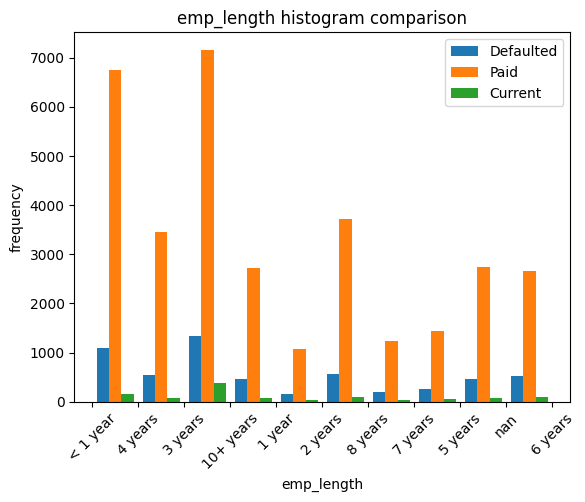

In [11]:
#Compare emp_length using hist graph across each of "defaulted", "Paid", "Current"
x = df_c["emp_length"].astype(str)
y = df_p["emp_length"].astype(str)
z = df_r["emp_length"].astype(str)

o1, o2, o3 = plt.hist([x, y, z], label=['Defaulted', 'Paid', 'Current'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=45)
plt.title('emp_length histogram comparison')
plt.xlabel('emp_length')
plt.ylabel('frequency')
plt.show()

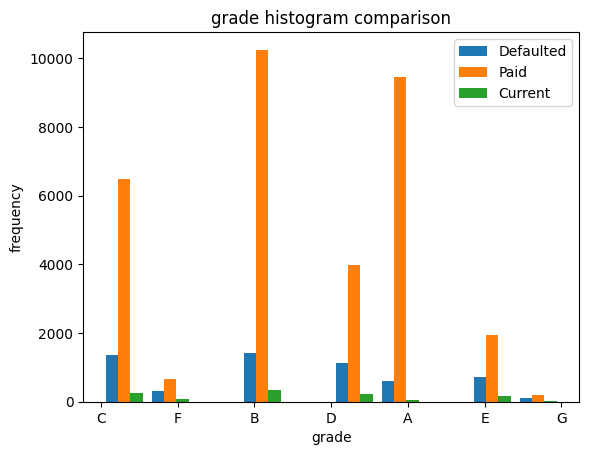

In [12]:
#Compare grade using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["grade"].astype(str)
y = df_p["grade"].astype(str)
z = df_r["grade"].astype(str)

o1,o2,o3 = plt.hist([x, y, z], label=['Defaulted', 'Paid', 'Current'])
plt.legend(loc='upper right')
#plt.xticks(o2, rotation=90)
plt.title('grade histogram comparison')
plt.xlabel('grade')
plt.ylabel('frequency')
plt.show()

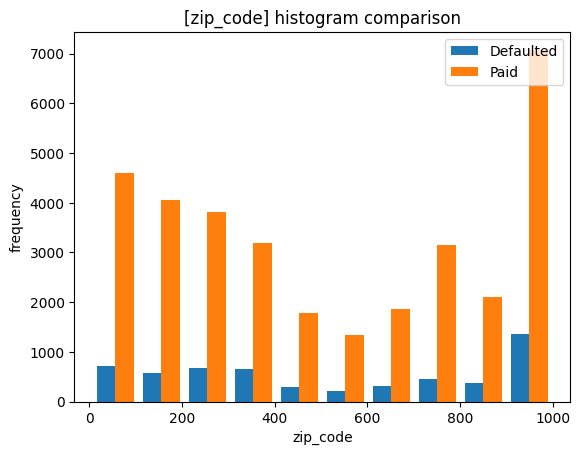

In [13]:

#Compare zip_code using hist graph across each of "defaulted", "Paid", "Current"
df_c.loc[:, ["zip_code"]] = df_c["zip_code"].apply(lambda x : x[:-2])
df_c.loc[:, ["zip_code"]] = df_c[df_c["zip_code"].notna()]

df_p.loc[:, ["zip_code"]] = df_p["zip_code"].apply(lambda x : x[:-2])
df_p.loc[:, ["zip_code"]] = df_p[df_p["zip_code"].notna()]

# dropna value
x = df_c["zip_code"].astype(int)
x = x.dropna()
y = df_p["zip_code"].astype(int)
y = y.dropna()
z = df_p["zip_code"].astype(int)
z = y.dropna()

o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
#plt.xticks(o2, rotation=90)
plt.title('[zip_code] histogram comparison')
plt.xlabel('zip_code')
plt.ylabel('frequency')
plt.show()

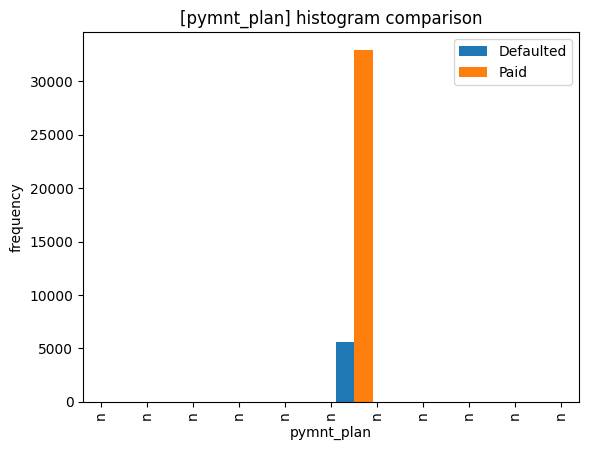

In [14]:
#Compare pymnt_plan using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["pymnt_plan"].astype(str)
y = df_p["pymnt_plan"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[pymnt_plan] histogram comparison')
plt.xlabel('pymnt_plan')
plt.ylabel('frequency')
plt.show()

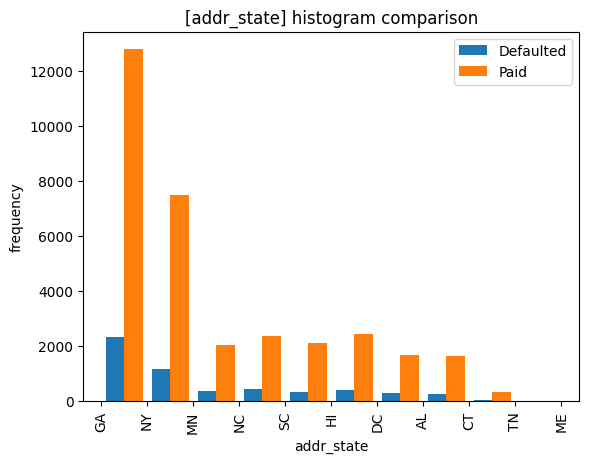

In [15]:
#Compare addr_state using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["addr_state"].astype(str)
y = df_p["addr_state"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[addr_state] histogram comparison')
plt.xlabel('addr_state')
plt.ylabel('frequency')
plt.show()

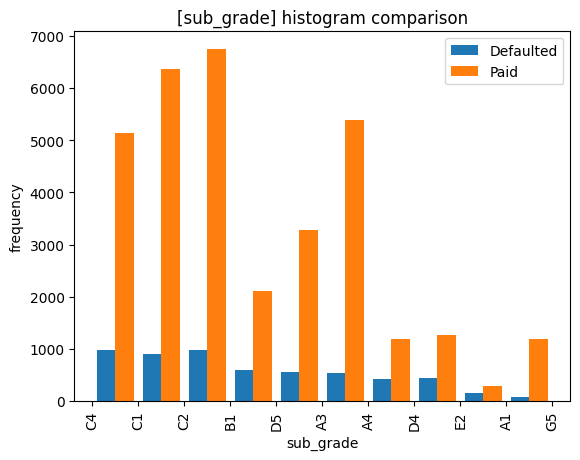

In [16]:
#Compare sub_grade variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["sub_grade"].astype(str)
y = df_p["sub_grade"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[sub_grade] histogram comparison')
plt.xlabel('sub_grade')
plt.ylabel('frequency')
plt.show()

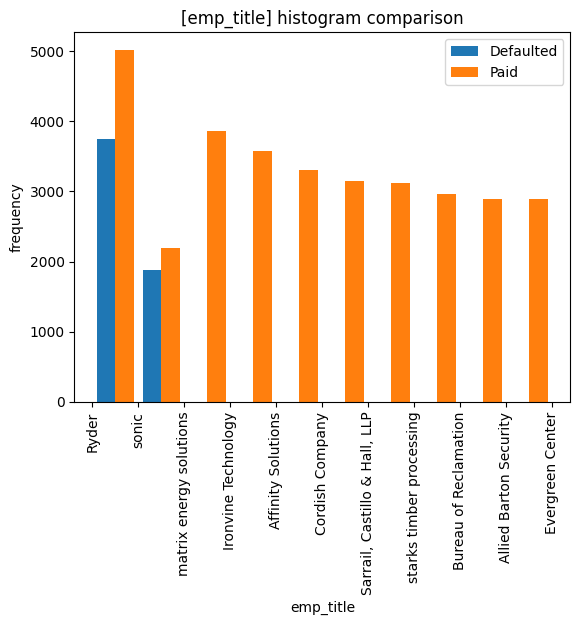

In [17]:
#Compare emp_title variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["emp_title"].astype(str)
y = df_p["emp_title"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[emp_title] histogram comparison')
plt.xlabel('emp_title')
plt.ylabel('frequency')
plt.show()

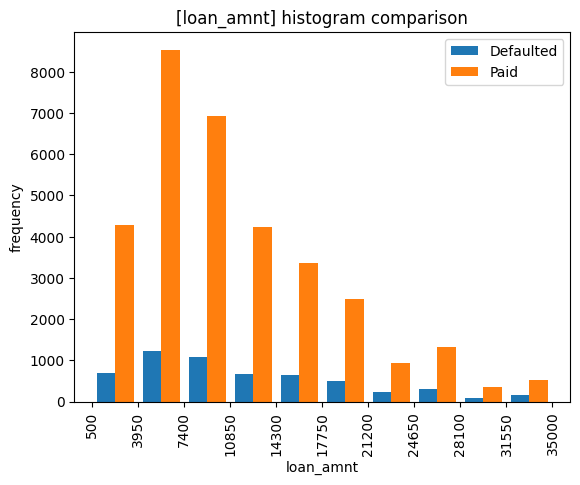

In [18]:
#Compare emp_title variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["loan_amnt"].astype(int)
y = df_p["loan_amnt"].astype(int)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[loan_amnt] histogram comparison')
plt.xlabel('loan_amnt')
plt.ylabel('frequency')
plt.show()

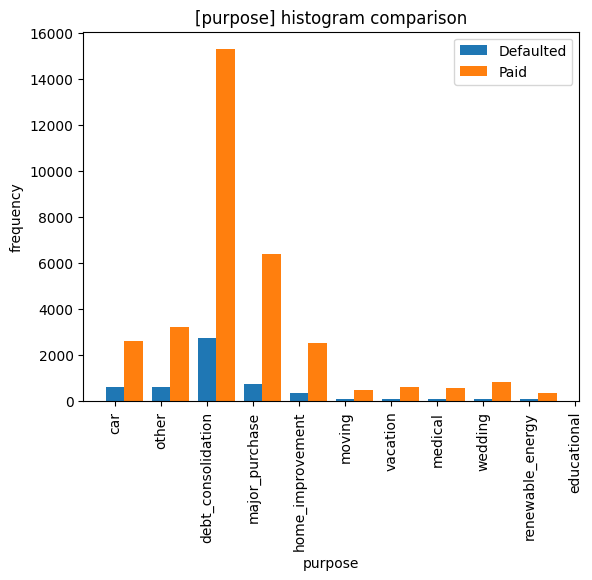

In [19]:
#Compare purpose variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["purpose"].astype(str)
y = df_p["purpose"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2+0.4, rotation=90)
plt.title('[purpose] histogram comparison')
plt.xlabel('purpose')
plt.ylabel('frequency')
plt.show()

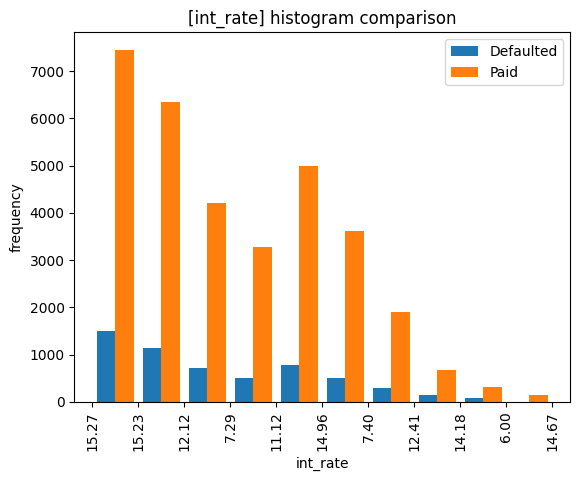

In [20]:
#Compare int_rate variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["int_rate"].astype(str)
y = df_p["int_rate"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[int_rate] histogram comparison')
plt.xlabel('int_rate')
plt.ylabel('frequency')
plt.show()

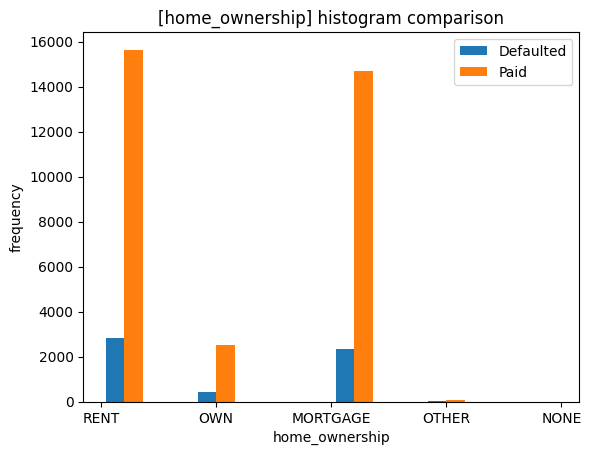

In [21]:
#Compare home_ownership variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["home_ownership"].astype(str)
y = df_p["home_ownership"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
#plt.xticks(o2, rotation=90)
plt.title('[home_ownership] histogram comparison')
plt.xlabel('home_ownership')
plt.ylabel('frequency')
plt.show()

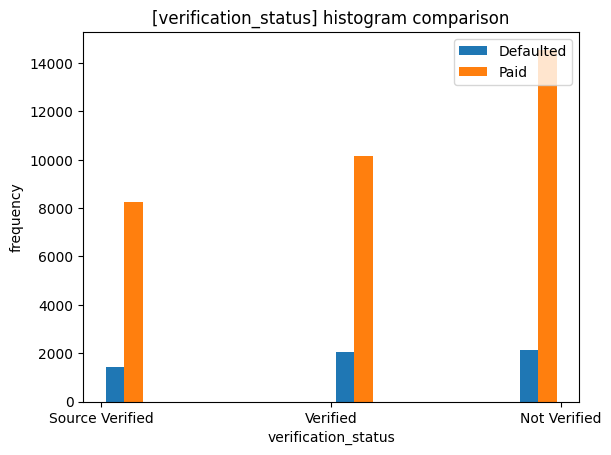

In [22]:
#Compare verification_status variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["verification_status"].astype(str)
y = df_p["verification_status"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[verification_status] histogram comparison')
plt.xlabel('verification_status')
plt.ylabel('frequency')
plt.show()

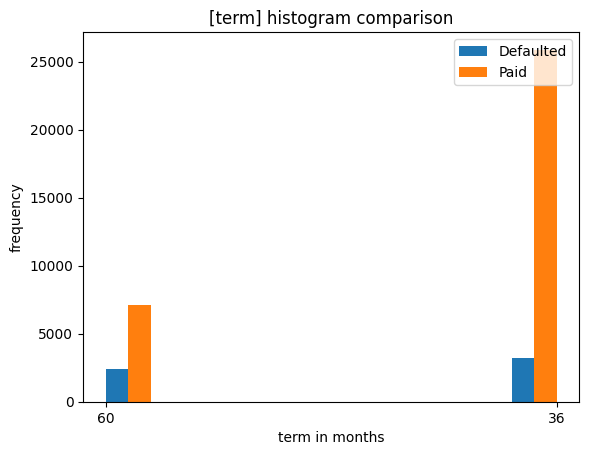

In [23]:
#Compare term variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["term"].astype(str)
y = df_p["term"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], rwidth=100)
plt.legend(loc='upper right')
plt.title('[term] histogram comparison')
plt.xlabel('term in months')
plt.ylabel('frequency')
plt.show()

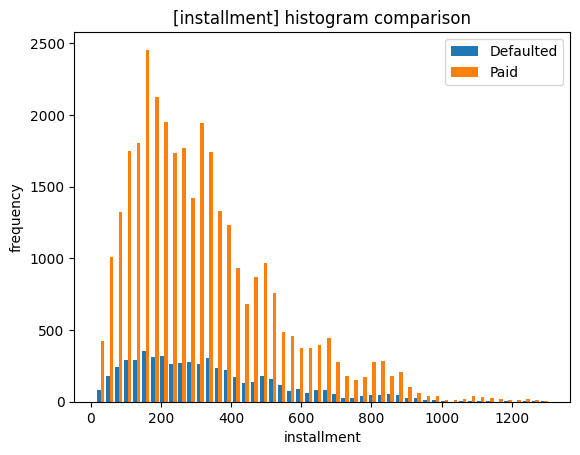

In [24]:
#Compare [installment] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["installment"].astype(float)
y = df_p["installment"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=50)
plt.legend(loc='upper right')
plt.title('[installment] histogram comparison')
plt.xlabel('installment')
plt.ylabel('frequency')
plt.show()

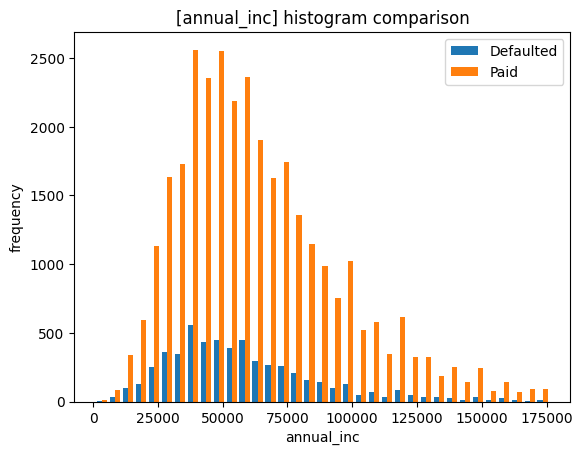

In [25]:
#Compare [annual_inc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["annual_inc"].astype(int)
y = df_p["annual_inc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'],bins=np.arange(1000, 180000, 5000))
plt.legend(loc='upper right')
plt.title('[annual_inc] histogram comparison')
plt.xlabel('annual_inc')
plt.ylabel('frequency')
plt.show()

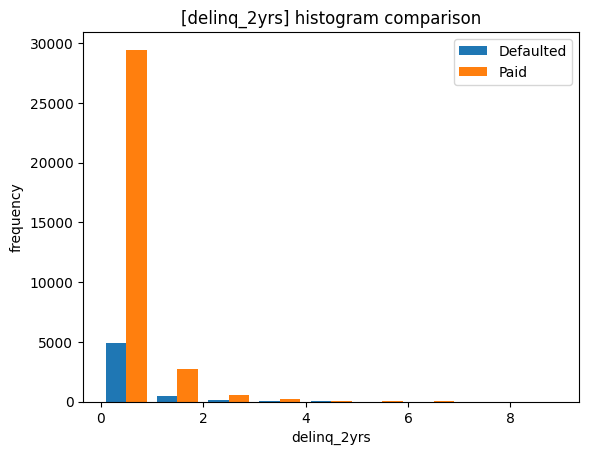

In [26]:
#Compare [delinq_2yrs] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["delinq_2yrs"].astype(int)
y = df_p["delinq_2yrs"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,10))
plt.legend(loc='upper right')
plt.title('[delinq_2yrs] histogram comparison')
plt.xlabel('delinq_2yrs')
plt.ylabel('frequency')
plt.show()

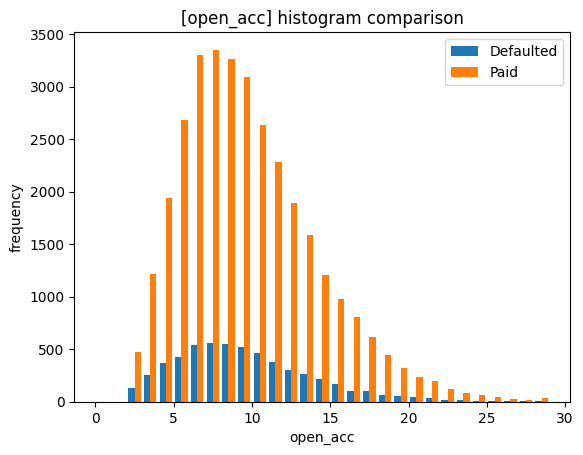

In [27]:
#Compare [open_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["open_acc"].astype(int)
y = df_p["open_acc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,30))
plt.legend(loc='upper right')
plt.title('[open_acc] histogram comparison')
plt.xlabel('open_acc')
plt.ylabel('frequency')
plt.show()

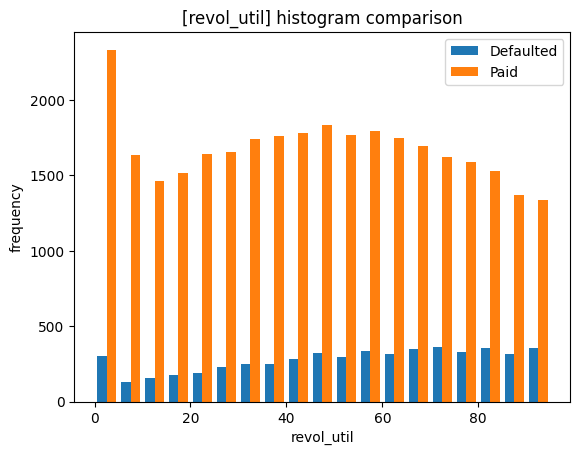

In [28]:
#Compare [revol_util] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["revol_util"].astype(float)
y = df_p["revol_util"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,5))
plt.legend(loc='upper right')
plt.title('[revol_util] histogram comparison')
plt.xlabel('revol_util')
plt.ylabel('frequency')
plt.show()

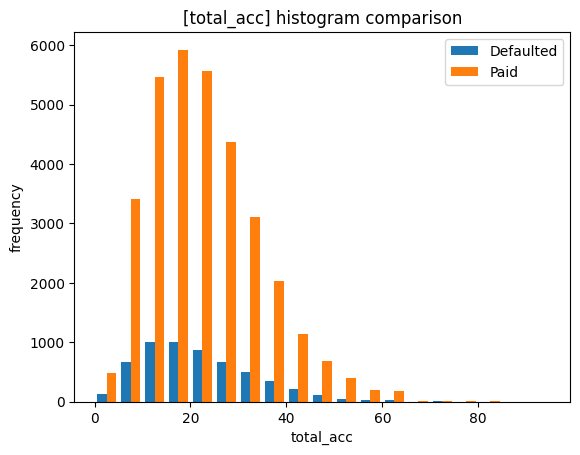

In [29]:
#Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_acc"].astype(float)
y = df_p["total_acc"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,5))
plt.legend(loc='upper right')
plt.title('[total_acc] histogram comparison')
plt.xlabel('total_acc')
plt.ylabel('frequency')
plt.show()

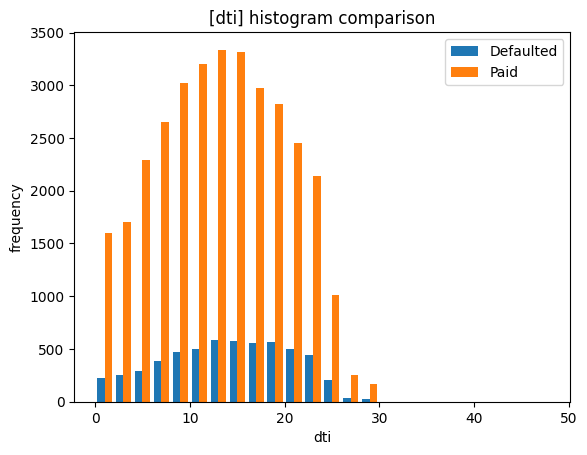

In [30]:
#Compare [dti] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["dti"].astype(float)
y = df_p["dti"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,50,2))
plt.legend(loc='upper right')
plt.title('[dti] histogram comparison')
plt.xlabel('dti')
plt.ylabel('frequency')
plt.show()

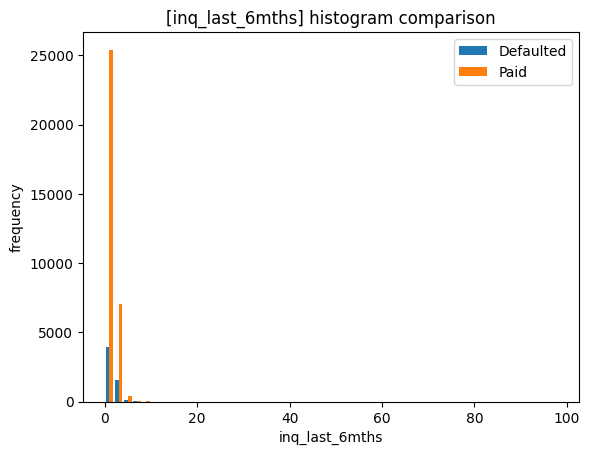

In [31]:
#Compare [inq_last_6mths] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["inq_last_6mths"]
y = df_p["inq_last_6mths"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.title('[inq_last_6mths] histogram comparison')
plt.xlabel('inq_last_6mths')
plt.ylabel('frequency')
plt.show()

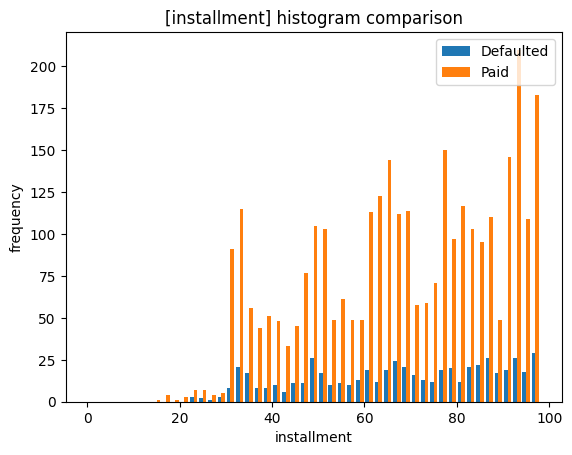

In [32]:
#Compare [installment] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["installment"]
y = df_p["installment"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.title('[installment] histogram comparison')
plt.xlabel('installment')
plt.ylabel('frequency')
plt.show()

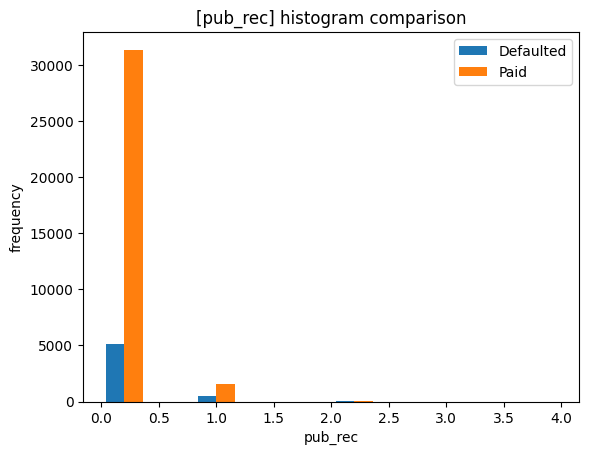

In [33]:
#Compare [pub_rec] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["pub_rec"]
y = df_p["pub_rec"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[pub_rec] histogram comparison')
plt.xlabel('pub_rec')
plt.ylabel('frequency')
plt.show()


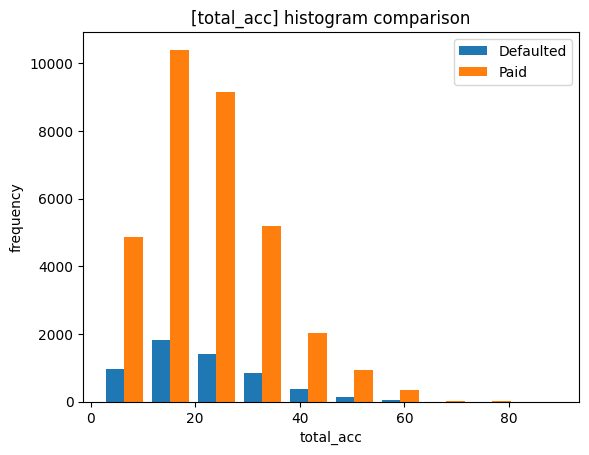

In [34]:
#Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_acc"].astype(int)
y = df_p["total_acc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[total_acc] histogram comparison')
plt.xlabel('total_acc')
plt.ylabel('frequency')
plt.show()


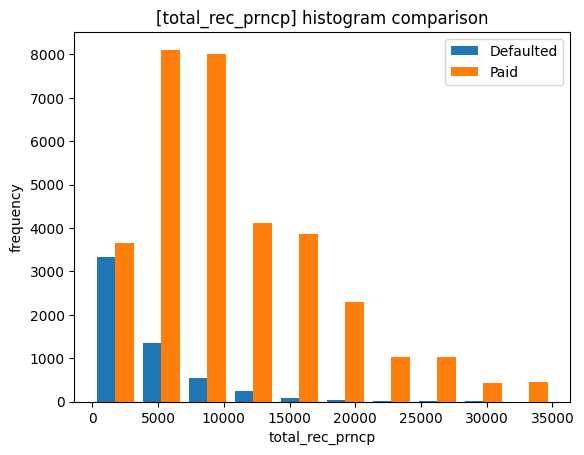

In [35]:
#Compare [total_rec_prncp] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_rec_prncp"].astype(int)
y = df_p["total_rec_prncp"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[total_rec_prncp] histogram comparison')
plt.xlabel('total_rec_prncp')
plt.ylabel('frequency')
plt.show()



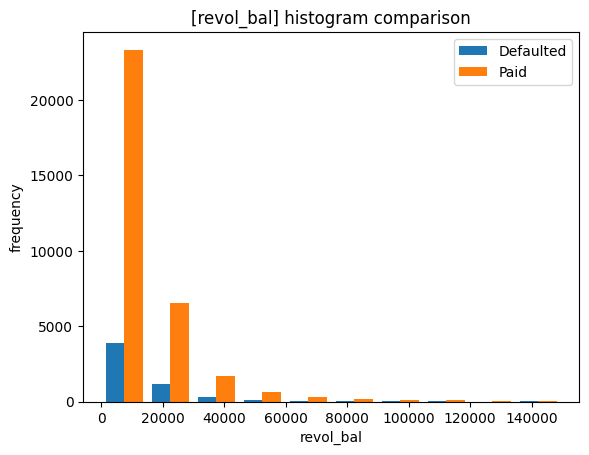

In [36]:
#Compare [revol_bal] variation using hist graph across each of "defaulted", "Paid"

x = df_c["revol_bal"].astype(int)
y = df_p["revol_bal"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[revol_bal] histogram comparison')
plt.xlabel('revol_bal')
plt.ylabel('frequency')
plt.show()


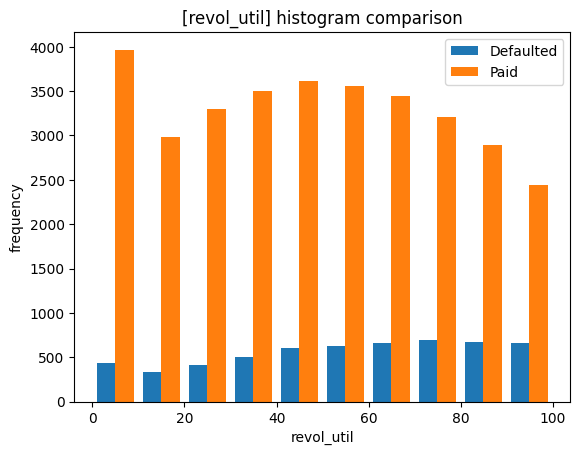

In [37]:
#Compare [revol_util] variation using hist graph across each of "defaulted", "Paid"

x = df_c["revol_util"].astype(float)
y = df_p["revol_util"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[revol_util] histogram comparison')
plt.xlabel('revol_util')
plt.ylabel('frequency')
plt.show()

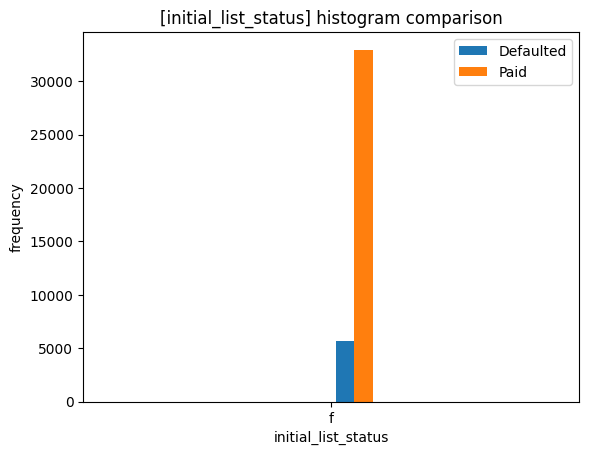

In [38]:
#Compare [initial_list_status] variation using hist graph across each of "defaulted", "Paid"

x = df_c["initial_list_status"].astype(str)
y = df_p["initial_list_status"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[initial_list_status] histogram comparison')
plt.xlabel('initial_list_status')
plt.ylabel('frequency')
plt.show()


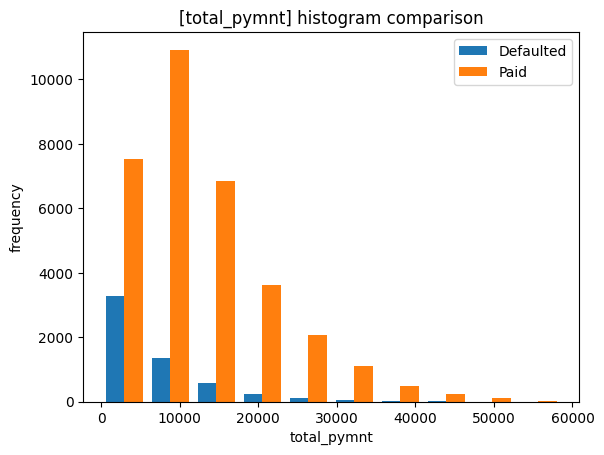

In [39]:
#Compare [total_pymnt] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_pymnt"].astype(int)
y = df_p["total_pymnt"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[total_pymnt] histogram comparison')
plt.xlabel('total_pymnt')
plt.ylabel('frequency')
plt.show()


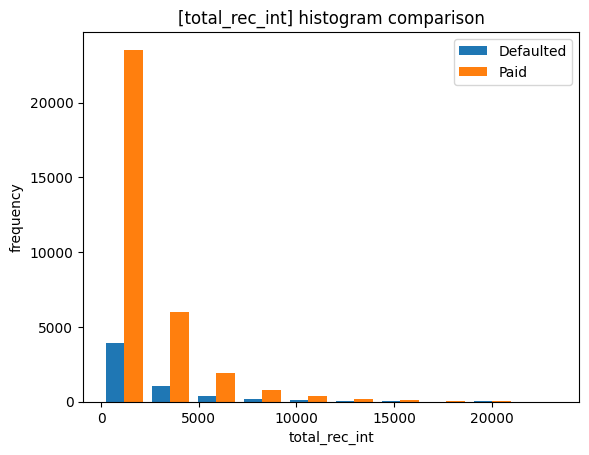

In [40]:
#Compare [total_rec_int] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_rec_int"].astype(int)
y = df_p["total_rec_int"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[total_rec_int] histogram comparison')
plt.xlabel('total_rec_int')
plt.ylabel('frequency')
plt.show()


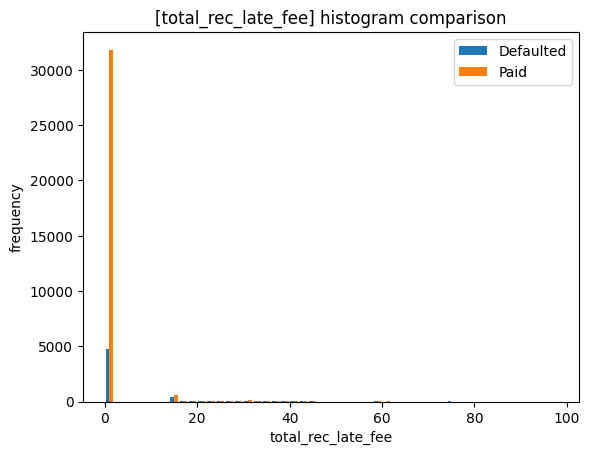

In [41]:
#Compare [total_rec_late_fee] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_rec_late_fee"].astype(float)
y = df_p["total_rec_late_fee"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.title('[total_rec_late_fee] histogram comparison')
plt.xlabel('total_rec_late_fee')
plt.ylabel('frequency')
plt.show()



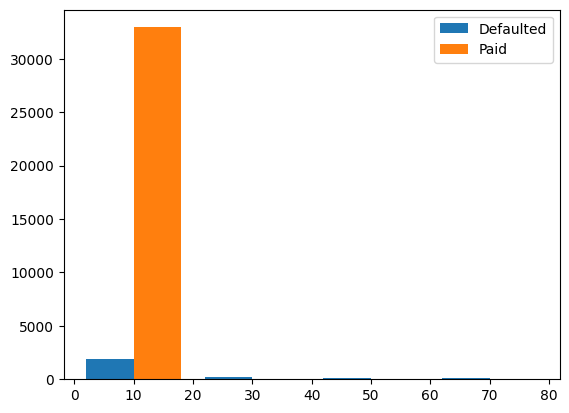

In [42]:
#Compare [recoveries] variation using hist graph across each of "defaulted", "Paid"

x = df_c["recoveries"].astype(int)
y = df_p["recoveries"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,20))
plt.legend(loc='upper right')
plt.show()


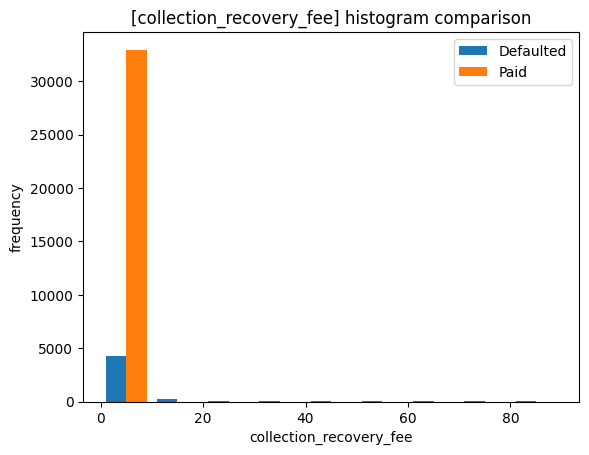

In [43]:
#Compare [collection_recovery_fee] variation using hist graph across each of "defaulted", "Paid"

x = df_c["collection_recovery_fee"].astype(int)
y = df_p["collection_recovery_fee"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,10))
#plt.xticks(range(len(x.columns)),rotation=100)

plt.legend(loc='upper right')
plt.title('[collection_recovery_fee] histogram comparison')
plt.xlabel('collection_recovery_fee')
plt.ylabel('frequency')
plt.show()



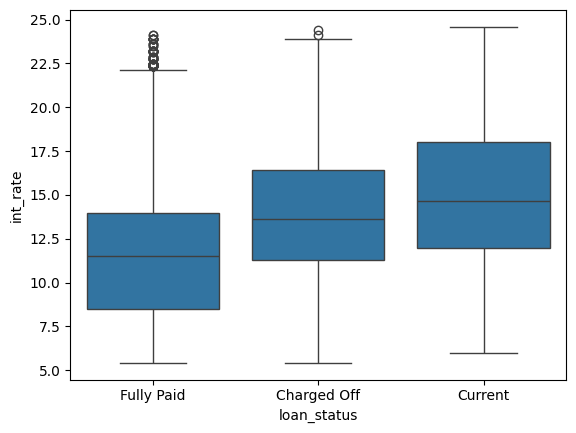

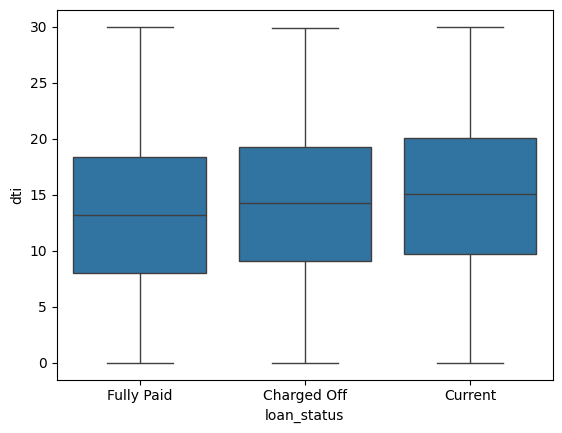

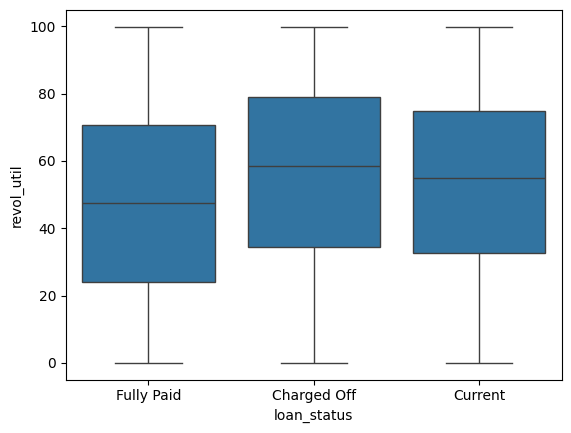

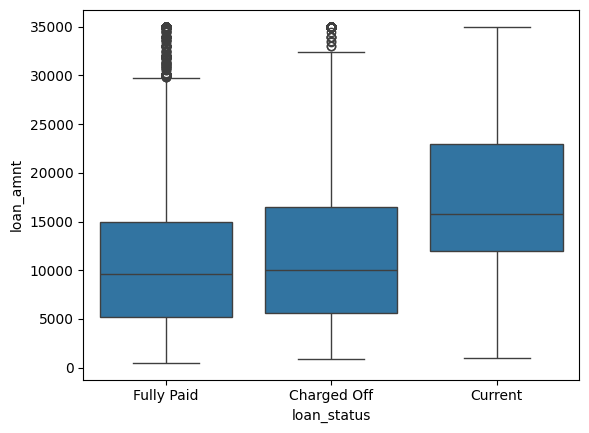

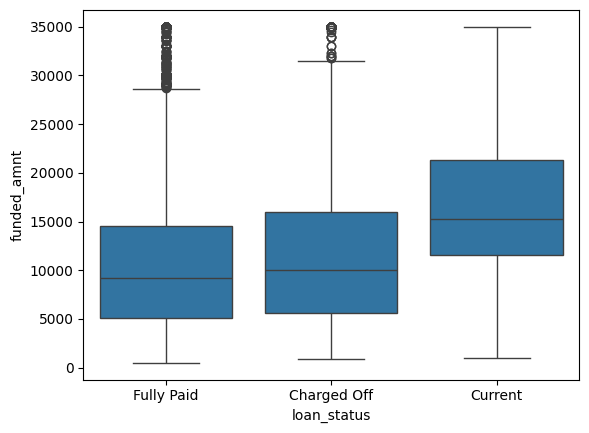

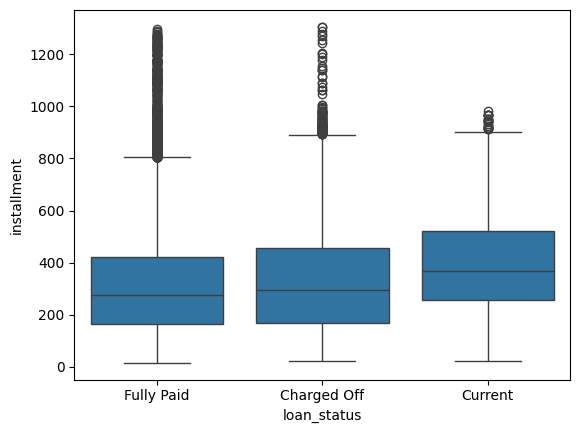

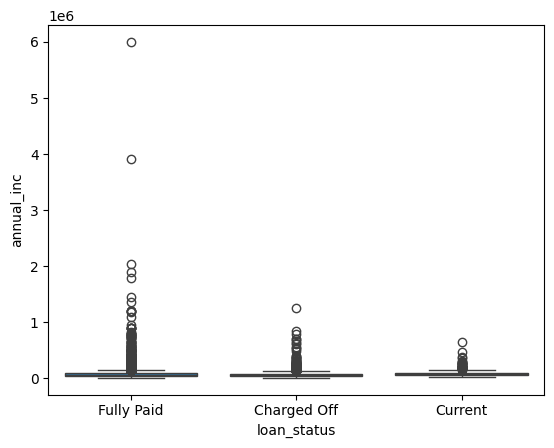

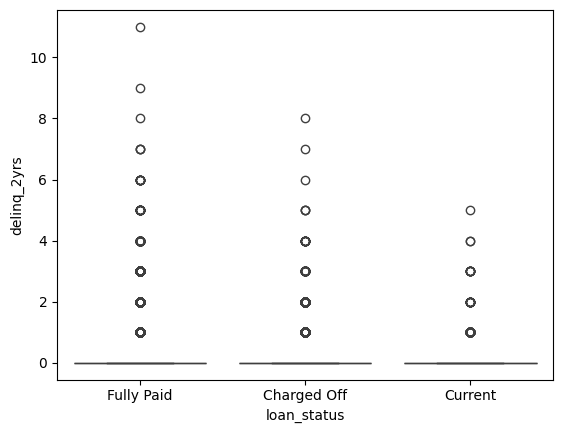

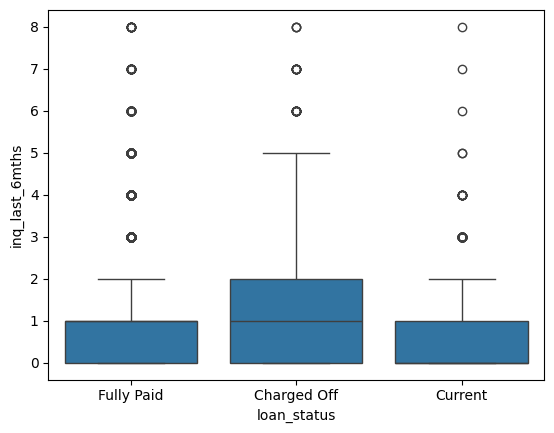

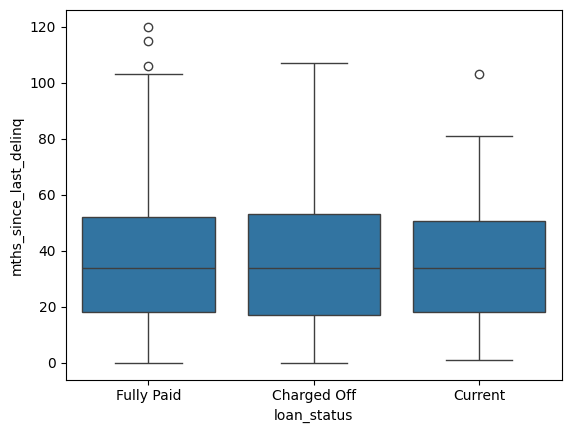

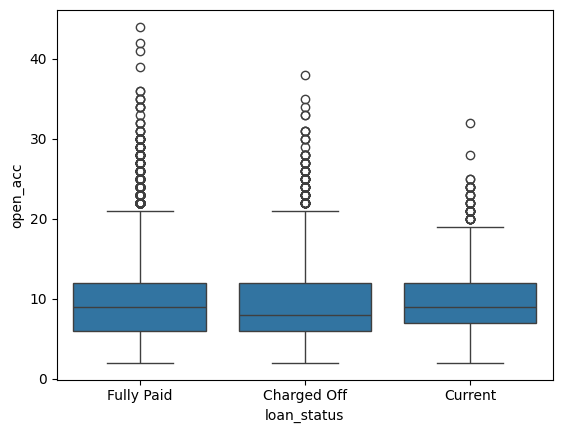

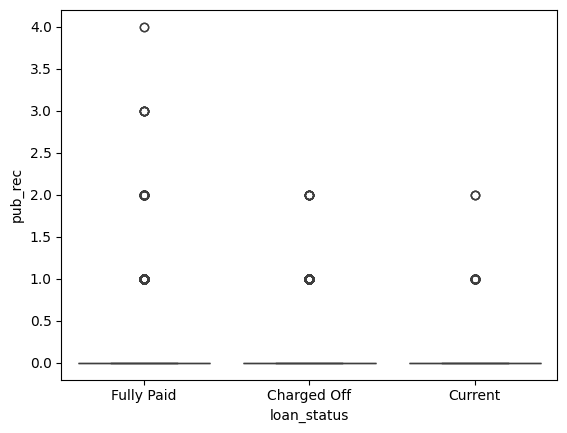

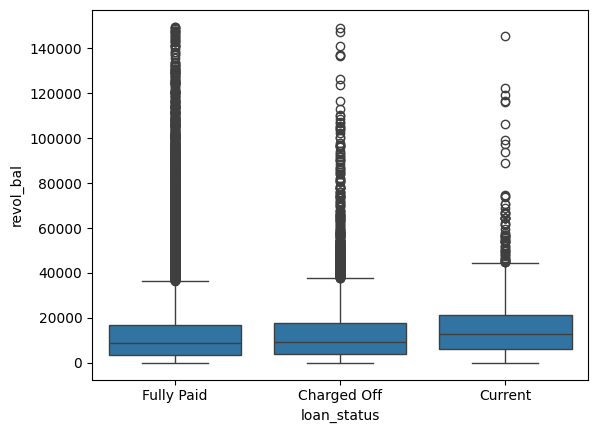

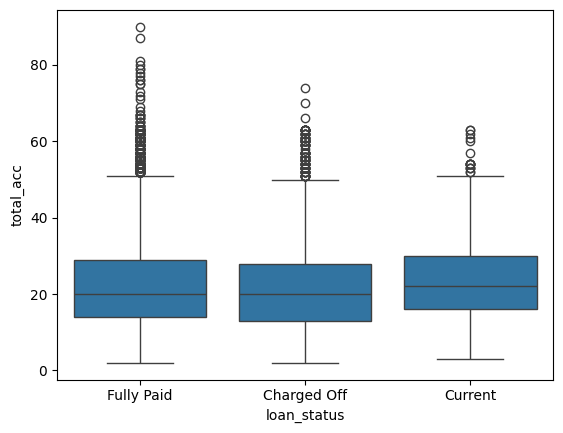

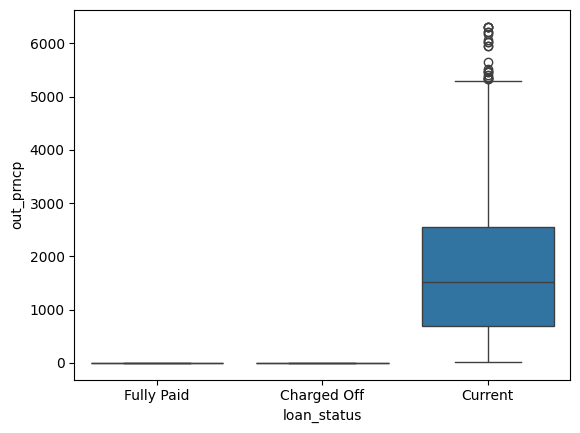

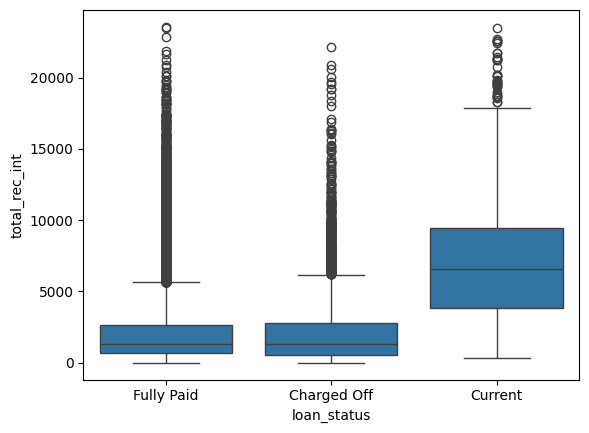

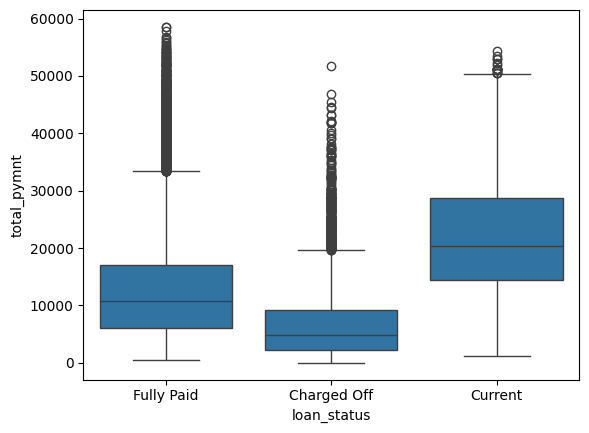

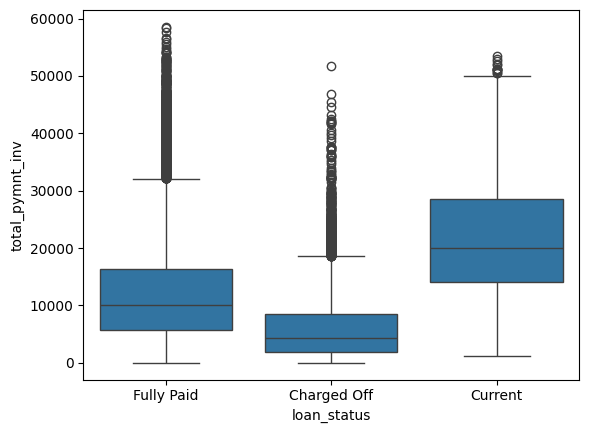

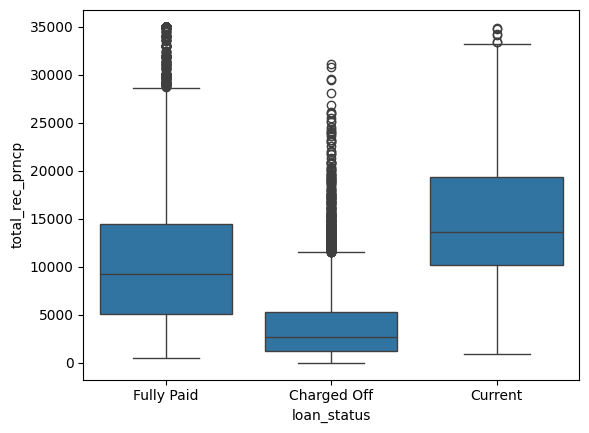

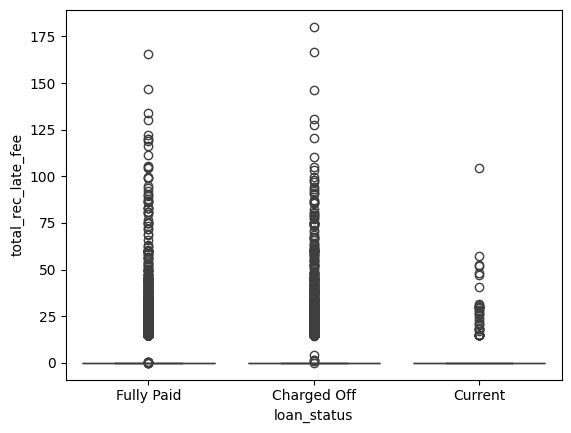

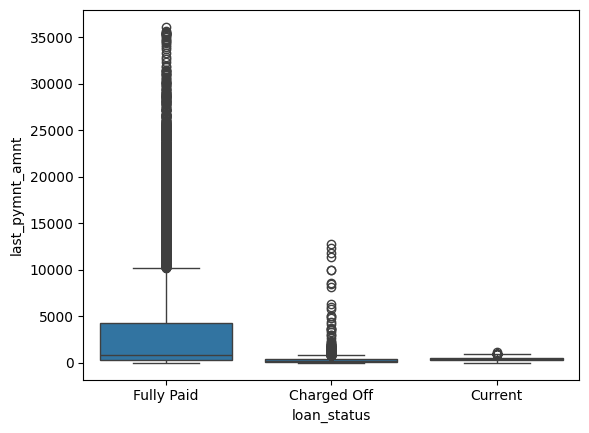

In [44]:
int_columns = ["loan_amnt", "funded_amnt", "installment", "annual_inc", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq",
               "open_acc", "pub_rec", "revol_bal",  "total_acc", "out_prncp", "total_rec_int", "total_pymnt", "total_pymnt_inv",
               "total_rec_prncp", "total_rec_late_fee", "last_pymnt_amnt"]
str_columns = ["term", "grade", 'sub_grade', 'emp_title','emp_length', 'home_ownership', 'emp_length', 'home_ownership','title', 'zip_code', 'addr_state',
                'initial_list_status']
float_columns = ["int_rate", "dti", "revol_util"]
date_columns = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]

# Boxplot comparision of alfloatl attribute for [Default] vs [Paid] vs [Current]
    
for col in float_columns :
    sns.boxplot(x=df1["loan_status"],y=df1[col].astype(float))
    plt.show()

# Boxplot comparision of int attribute for [Default] vs [Paid] vs [Current]

for col in int_columns :
    sns.boxplot(x=df1["loan_status"],y=df1[col])
    plt.show()


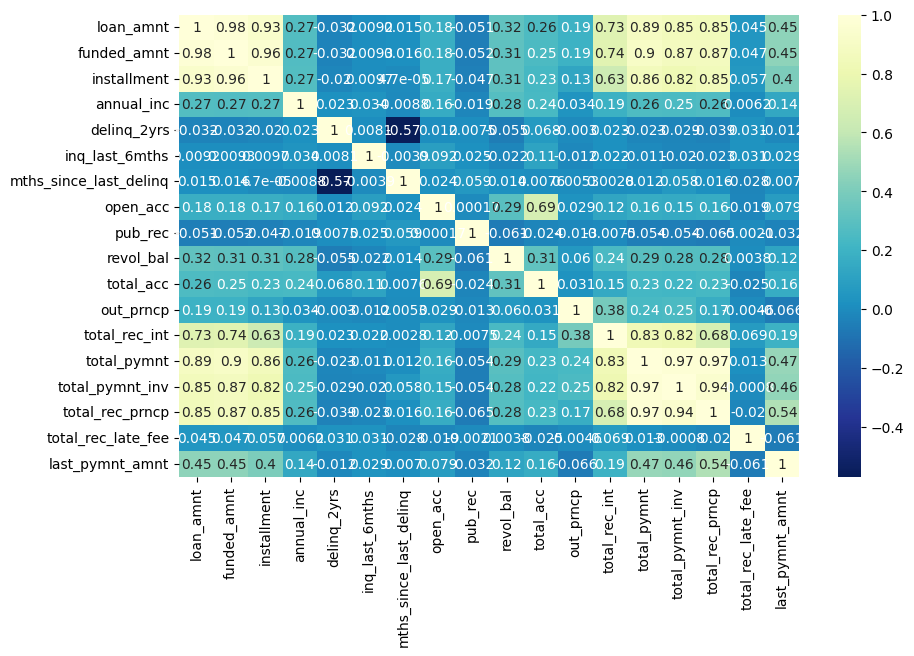

In [48]:
int_columns = ["loan_amnt", "funded_amnt", "installment", "annual_inc", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq",
               "open_acc", "pub_rec", "revol_bal",  "total_acc", "out_prncp", "total_rec_int", "total_pymnt", "total_pymnt_inv",
               "total_rec_prncp", "total_rec_late_fee", "last_pymnt_amnt"]
str_columns = ["term", "grade", 'sub_grade', 'emp_title','emp_length', 'home_ownership', 'emp_length', 'home_ownership','title', 'zip_code', 'addr_state',
                'initial_list_status']
float_columns = ["int_rate", "dti", "revol_util"]
date_columns = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]

plt.figure(figsize=(10,6))
sns.heatmap(df[int_columns].corr(),annot=True,cmap="YlGnBu_r")
plt.show()

